In [59]:
import pickle
import numpy as np
from symbolic_regression.utils.visualization import plot_results
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [60]:
data = pickle.load(open("data_20260207_155902.pkl", "rb"))['kwargs']
results_df, features, equations = data['df'], data['features'], data['equations']

In [61]:
# results_df = results_df.drop('GP', level='method', axis=1)

# import pandas as pd
# data = pickle.load(open("abs.pkl", "rb"))['kwargs']

# results_df_abs, features_abs, equations_abs = data['df'], data['features'], data['equations']
# results_df_abs = results_df_abs.drop('GP', level='method', axis=1)
# results_df_abs.columns = pd.MultiIndex.from_tuples(
#     [(col[0], col[1] + "_abs", col[2]) for col in results_df_abs.columns],
#     names=results_df.columns.names
# )
# results_df = pd.concat([results_df, results_df_abs], axis=1).sort_index(axis=1)

In [62]:
results_df.head(2)  

dataset                F1                                                \
method              GPCMI                                            GP   
metric    training_losses validation_losses test_losses training_losses   
run epoch                                                                 
0   10           0.130543          0.125043    0.150516        0.177437   
    20           0.049481          0.076216    0.056010        0.152147   

dataset                                                                    \
method                                          RFGPCMI                     
metric    validation_losses test_losses training_losses validation_losses   
run epoch                                                                   
0   10             0.222733    0.257997        0.086921          0.051362   
    20             0.201704    0.244029        0.015661          0.018955   

dataset                                ...         CCN                  \
method                           GPPI  ...          GP         RFGPCMI   
metric    test_losses training_losses  ... test_losses training_losses   
run epoch                              ...                               
0   10       0.048052        0.236083  ...    0.216384        0.182392   
    20       0.022436        0.133557  ...    0.212543        0.181973   

dataset                                                                    \
method                                             GPPI                     
metric    validation_losses test_losses training_losses validation_losses   
run epoch                                                                   
0   10             0.195968    0.191677        0.190844           0.20728   
    20             0.195082    0.190185        0.192058           0.20369   

dataset                                                              
method                         GPSHAP                                
metric    test_losses training_losses validation_losses test_losses  
run epoch                                                            
0   10       0.216384        0.240232          0.258206    0.237636  
    20       0.216384        0.251008          0.223294    0.237636  

[2 rows x 45 columns]

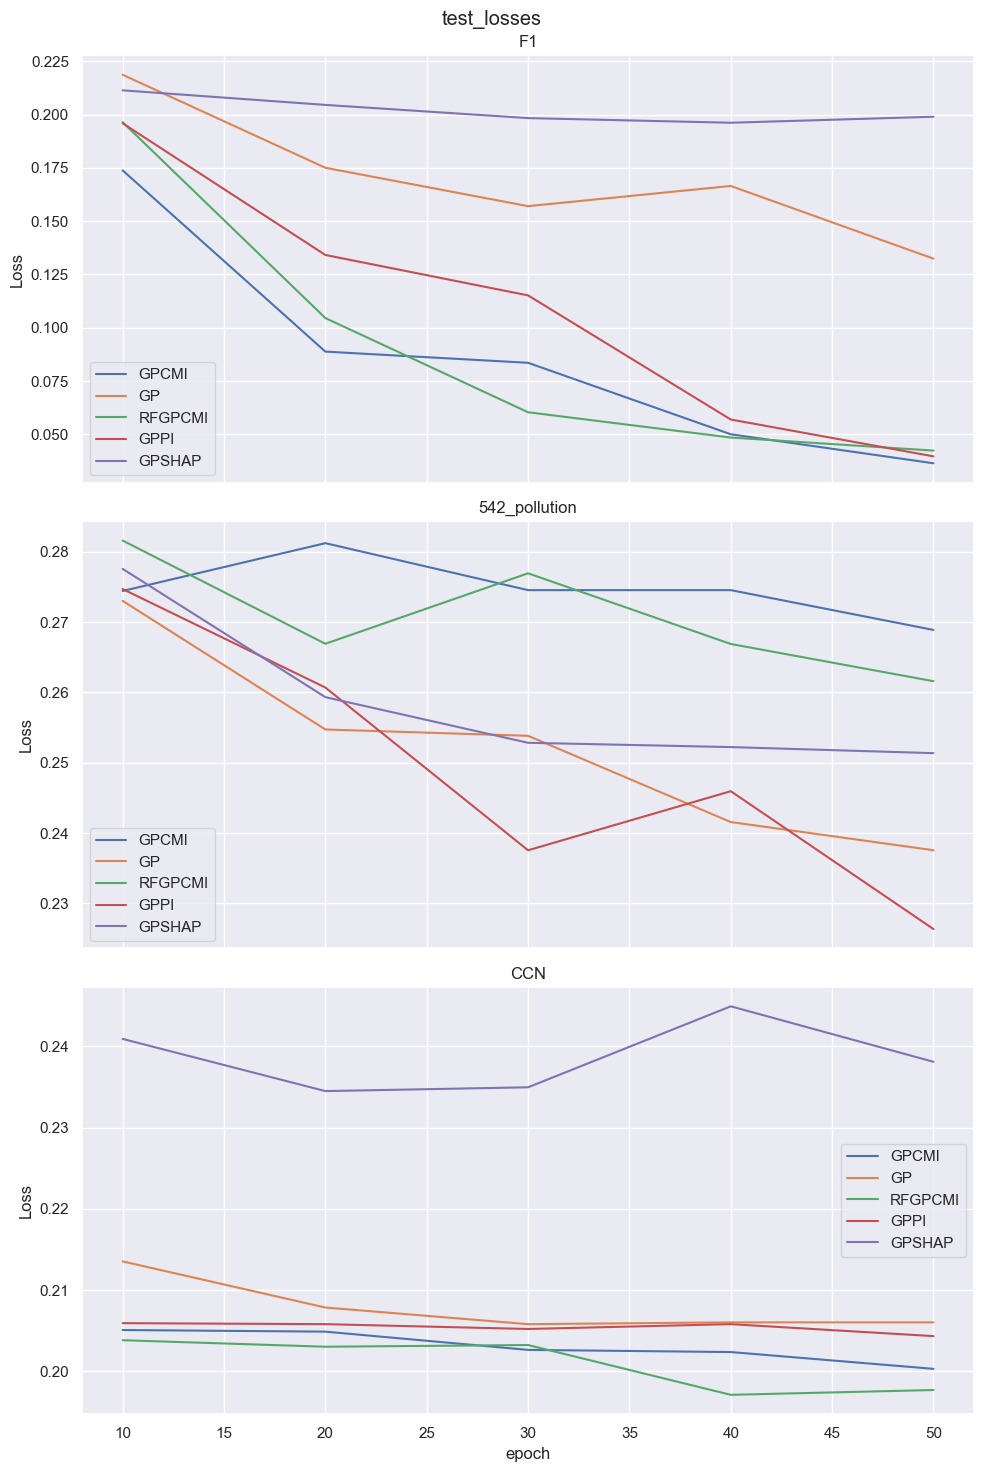

In [63]:
fig, axes = plot_results(
    results_df.groupby(level='epoch').median(), 
    nrows=3, 
    # ncols=2, 
    group_level="dataset",
    value_level="metric",
    value_key="test_losses",
    plotting_function=lambda data, ax: sns.lineplot(data=data, ax=ax, dashes=None)
)

fig.figure.set_size_inches(10, 15)
fig.tight_layout(w_pad=0.5)

# axes[2].set_ylim(0, 0.01)
# fig.suptitle("GPSHAP", y=1.01)
plt.show()

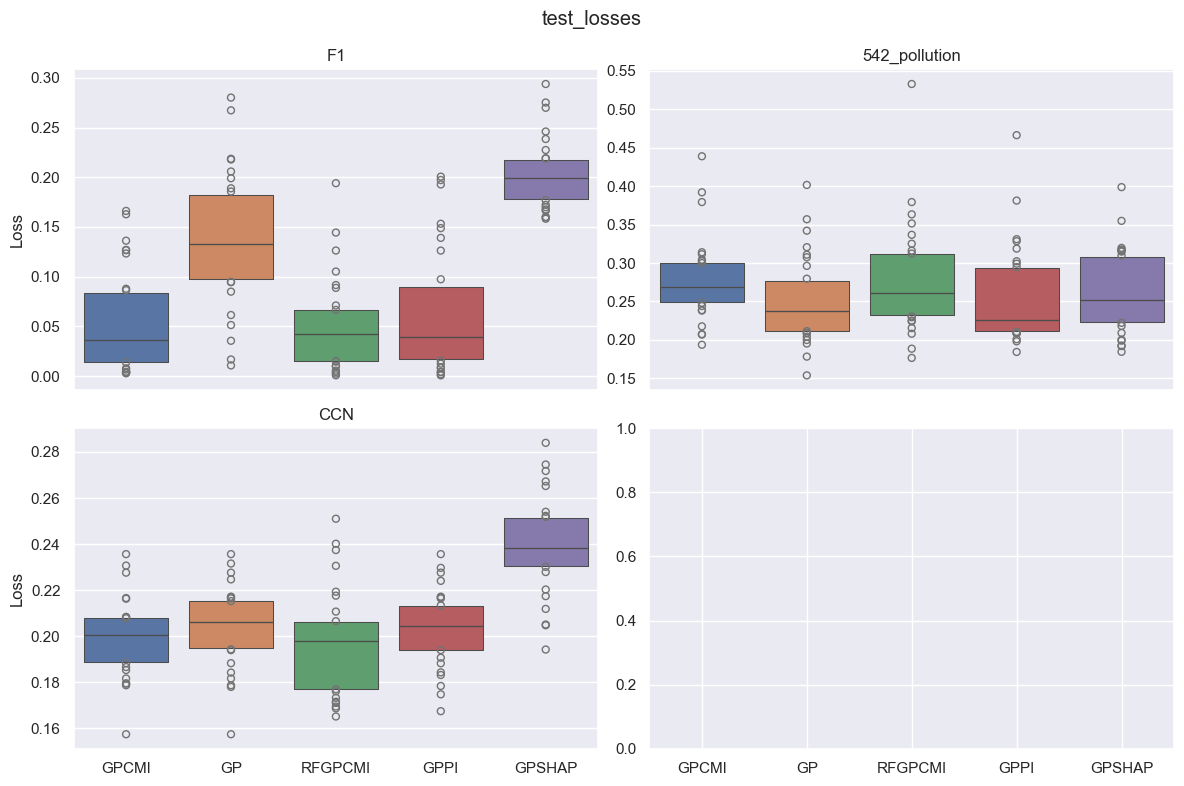

In [64]:
fig, axes = plot_results(
    results_df.groupby(level='run').last(), 
    nrows=2, 
    # ncols=3, 
    # group_level="model",
    # value_level="metric", 
    value_key="test_losses"
    # value_key="validation_losses",
    # value_key="training_losses"
)

fig.figure.set_size_inches(12, 8)
# # fig.figure.set_size_inches(4, 6)
fig.tight_layout(w_pad=0.5)
# fig.suptitle("Test Loss for Different Methods", y=1.04)
# fig.supylabel("Test Loss", x=-.02)
# fig.supxlabel("Methods", y=-.05)

# axes[0].set_ylim(0, 0.02)
# axes[1].set_ylim(.0, 0.3)
# axes[3].set_ylim(.0, 0.4)
plt.show()

In [6]:
print('Mean Unique Features per Method')
print('-------------------------------\n')

for dataset_name in features.keys():
    print(f"{dataset_name} features:")

    for method in features[dataset_name].keys():
        list_of_lists = features[dataset_name][method]

        if isinstance(list_of_lists[0][0], str):
            a = [len(alist) for alist in list_of_lists]

        else:
            a = [len(set([item for sublist in alist for item in sublist])) for alist in list_of_lists]
        
        print(f"{method}: {np.mean(a):.2f} ± {np.std(a):.2f}")
    print()
            

Mean Unique Features per Method
-------------------------------

Friedman2 features:
GPSHAP: 2.00 ± 0.00
GP: 4.00 ± 0.00

Friedman1 features:
GPSHAP: 3.00 ± 0.00
GP: 10.00 ± 0.00

542_pollution features:
GPSHAP: 4.00 ± 0.00
GP: 15.00 ± 0.00



In [6]:
from symbolic_regression.utils.datasets import list_available_datasets, load_datasets

In [5]:
list_available_datasets()

['4544_GeographicalOriginalofMusic',
 '505_tecator',
 '542_pollution',
 'Communities and Crime',
 'Communities and Crime Unnormalized',
 'F1',
 'F2',
 'Friedman1',
 'Friedman2',
 'Friedman3',
 'Superconductivty Data']

In [14]:
dataset = load_datasets(['Superconductivty Data'])['Superconductivty Data']
X, y = dataset['X'], dataset['y']

In [52]:
# Source - https://stackoverflow.com/a
# Posted by Atmani Saad, modified by community. See post 'Timeline' for change history
# Retrieved 2026-01-08, License - CC BY-SA 4.0


y#.iloc[:, list(range(3)) + list(range(-3, 0))]


array([29.  , 26.  , 19.  , ...,  1.98,  1.84, 12.8 ], shape=(21263,))

In [53]:
dataset

{'X':        number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  std_atomic_mass  wtd_std_atomic_mass    mean_fie  wtd_mean_fie   gmean_fie  wtd_gmean_fie  entropy_fie  wtd_entropy_fie  range_fie  wtd_range_fie     std_fie  wtd_std_fie  mean_atomic_radius  wtd_mean_atomic_radius  gmean_atomic_radius  wtd_gmean_atomic_radius  entropy_atomic_radius  wtd_entropy_atomic_radius  range_atomic_radius  wtd_range_atomic_radius  std_atomic_radius  wtd_std_atomic_radius  mean_Density  wtd_mean_Density  gmean_Density  wtd_gmean_Density  entropy_Density  wtd_entropy_Density  range_Density  wtd_range_Density  std_Density  wtd_std_Density  mean_ElectronAffinity  wtd_mean_ElectronAffinity  gmean_ElectronAffinity  wtd_gmean_ElectronAffinity  entropy_ElectronAffinity  wtd_entropy_ElectronAffinity  range_ElectronAffinity  wtd_range_ElectronAffinity  std_ElectronAffinit